**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [ ]:
!pip install torch torchvision

In [2]:
import torch
import numpy as np

In [118]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [137]:
t_inputs = torch.from_numpy(inputs)
t_targets = torch.from_numpy(targets)

In [129]:
t_inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [178]:
torch.random.manual_seed(1)

In [179]:
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(1, requires_grad=True)
w, b

(tensor([[0.6614, 0.2669, 0.0617]], requires_grad=True),
 tensor([0.6213], requires_grad=True))

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [180]:
def model(t_inputs, w, b):
    z = t_inputs@torch.t(w) + b
    return 1/(1+torch.exp(-z))

In [181]:
predicted_probs = model(t_inputs, w, b)
print(predicted_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


На рандомних значеннях w та b результат кожного рядочка дуже близький до 0

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [182]:
def binary_cross_entropy(predicted_probs, true_labels):
    log1 = true_labels*torch.log(predicted_probs)
    log2 = (1-true_labels)*torch.log(1-predicted_probs)
    entropies = -(log1 + log2)
    return torch.mean(entropies)

In [183]:
loss = binary_cross_entropy(predicted_probs, t_targets)

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [184]:
loss.backward()

In [185]:
print(w.grad)
print(b.grad)

tensor([[nan, nan, nan]])
tensor([nan])


**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [228]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [210]:
w, b

(tensor([[6.6135e-04, 2.6692e-04, 6.1677e-05]], requires_grad=True),
 tensor([0.0006], requires_grad=True))

In [211]:
predicted_probs = model(t_inputs, w, b)
print(predicted_probs)
loss = binary_cross_entropy(predicted_probs, t_targets)
loss.backward()

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)


In [212]:
print(w.grad, b.grad)

tensor([[ -5.4417, -18.9853, -10.0682]]) tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [226]:
def grad_desc(inputs, targets,  model, w, b, alpha, epochs):
    epoch = 0
    loss_threshold = 0.03
    loss_item = float('inf')
    while epoch < epochs and loss_item > loss_threshold:
        predicted_probs = model(inputs, w, b)
        loss = binary_cross_entropy(predicted_probs, targets)
        loss.backward()
        with torch.no_grad():
            w -= w.grad * alpha
            b -= b.grad * alpha
            w.grad.zero_()
            b.grad.zero_()
        epoch += 1
        loss_item = loss.item()
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, loss = {loss.item()}')
        
    print(f'Final loss:{loss.item()}')
    return {'w': w, 'b': b}

In [232]:
epochs = 1000
alpha = 1e-3
params = grad_desc(t_inputs, t_targets, model, w, b, alpha, epochs)

Epoch 100, loss = 0.03297306224703789
Epoch 200, loss = 0.03153730183839798
Epoch 300, loss = 0.03021698258817196
Final loss:0.029990550130605698


In [238]:
params['w'].tolist()

[[-0.4359252154827118, 0.1179201751947403, 0.5006595253944397]]

In [245]:
print(f'Final values are \nweights : {params["w"].tolist()}, \nbias : {params["b"].item()}')

Final values are 
weights : [[-0.4359252154827118, 0.1179201751947403, 0.5006595253944397]], 
bias : -0.02110949717462063


Запустила градієнтний спуск кілька разів, вважаю, що отримала мінімальне значення loss 0.02 (далі воно провалюється в nan)

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [35]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [ ]:
pip install pandas

In [5]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

In [36]:
t_inputs = torch.from_numpy(inputs)
t_targets = torch.from_numpy(targets)
train_ds = TensorDataset(t_inputs, t_targets)
for i in range(3):
    print(train_ds[i])

(tensor([73., 67., 43.]), tensor([0.]))
(tensor([91., 88., 64.]), tensor([1.]))
(tensor([ 87., 134.,  58.]), tensor([1.]))


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [37]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [38]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 5)
        self.act1 = nn.Sigmoid()
        self.linear2 = nn.Linear(5, 1)
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        return x

In [39]:
model = LogReg()

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [40]:
optimizer = torch.optim.SGD(model.parameters(), 1e-2)
loss_fn = F.binary_cross_entropy

In [41]:
preds = model(t_inputs)

In [43]:
df = pd.DataFrame({'targets': t_targets.tolist(), 'predictions': preds.tolist()})

In [44]:
df

,targets,predictions
0,[0.0],[0.6540874242782593]
1,[1.0],[0.6540874242782593]
2,[1.0],[0.6540874242782593]
3,[0.0],[0.6420103907585144]
4,[1.0],[0.6540874242782593]
5,[0.0],[0.6540874242782593]
6,[1.0],[0.6540874242782593]
7,[1.0],[0.6540874242782593]
8,[0.0],[0.6420103907585144]
9,[1.0],[0.6540874242782593]


In [45]:
loss_data = loss_fn(preds, t_targets)

In [46]:
print(loss_data.item())

0.6724725961685181


На мою думку, модель не навчилася

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [47]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return {'losses': losses, 'model': model}

In [48]:
loss = fit_return_loss(1000, model, loss_fn, optimizer, train_dl)

Epoch [10/1000], Loss: 0.6501
Epoch [20/1000], Loss: 0.6415
Epoch [30/1000], Loss: 0.6369
Epoch [40/1000], Loss: 0.6319
Epoch [50/1000], Loss: 0.6287
Epoch [60/1000], Loss: 0.6232
Epoch [70/1000], Loss: 0.6201
Epoch [80/1000], Loss: 0.6155
Epoch [90/1000], Loss: 0.6108
Epoch [100/1000], Loss: 0.6068
Epoch [110/1000], Loss: 0.6026
Epoch [120/1000], Loss: 0.5994
Epoch [130/1000], Loss: 0.5955
Epoch [140/1000], Loss: 0.5921
Epoch [150/1000], Loss: 0.5892
Epoch [160/1000], Loss: 0.5860
Epoch [170/1000], Loss: 0.5825
Epoch [180/1000], Loss: 0.5796
Epoch [190/1000], Loss: 0.5771
Epoch [200/1000], Loss: 0.5748
Epoch [210/1000], Loss: 0.5712
Epoch [220/1000], Loss: 0.5686
Epoch [230/1000], Loss: 0.5661
Epoch [240/1000], Loss: 0.5650
Epoch [250/1000], Loss: 0.5615
Epoch [260/1000], Loss: 0.5592
Epoch [270/1000], Loss: 0.5565
Epoch [280/1000], Loss: 0.5547
Epoch [290/1000], Loss: 0.5533
Epoch [300/1000], Loss: 0.5516
Epoch [310/1000], Loss: 0.5482
Epoch [320/1000], Loss: 0.5474
Epoch [330/1000],

In [49]:
fitted_model = loss['model']

In [50]:
final_preds = fitted_model(t_inputs)
dff = pd.DataFrame({'targets': t_targets.tolist(), 'predictions': final_preds.tolist()})
dff

,targets,predictions
0,[0.0],[0.7243790626525879]
1,[1.0],[0.7234110236167908]
2,[1.0],[0.725604772567749]
3,[0.0],[0.161299929022789]
4,[1.0],[0.7255984544754028]
5,[0.0],[0.7243790626525879]
6,[1.0],[0.7234110236167908]
7,[1.0],[0.725604772567749]
8,[0.0],[0.161299929022789]
9,[1.0],[0.7255984544754028]


Лосс зменшується, але модель для всіх рядків видає дуже схожі прогнози, що ніяк не дає різницю для класифікації 0 чи 1(

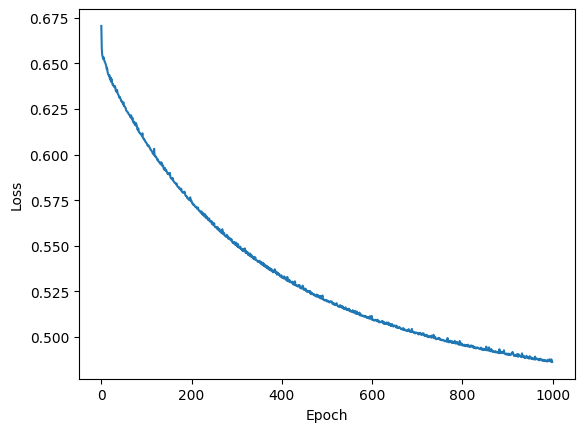

In [51]:
import matplotlib.pyplot as plt
plt.plot(loss['losses'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

"Ліктя" тут на жаль немає(